<a href="https://colab.research.google.com/github/Bhushan4-tech/DeepLearning-/blob/main/Chrurn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/grive")

Drive already mounted at /content/grive; to attempt to forcibly remount, call drive.mount("/content/grive", force_remount=True).


In [2]:
!nvidia-smi

Mon Sep 19 04:52:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [68]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [4]:
df = pd.read_csv("/content/grive/MyDrive/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

We drop unusable feature

In [6]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In CreditScore

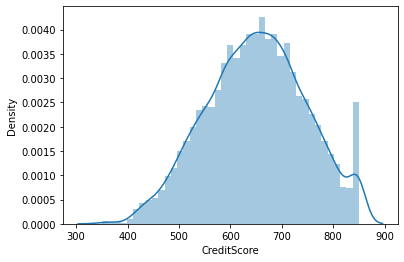

In [69]:
sns.distplot(df["CreditScore"])

In Geography

In [7]:
df.Geography.nunique(),df.Geography.unique()

(3, array(['France', 'Spain', 'Germany'], dtype=object))

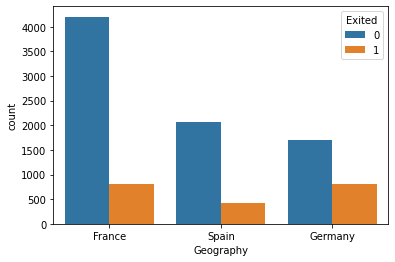

In [70]:
sns.countplot(df["Geography"],hue = df["Exited"])

In Gender

In [8]:
df.Gender.nunique(),df.Gender.unique()

(2, array(['Female', 'Male'], dtype=object))

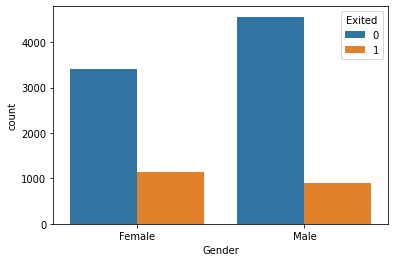

In [71]:
sns.countplot(df["Gender"],hue = df["Exited"])

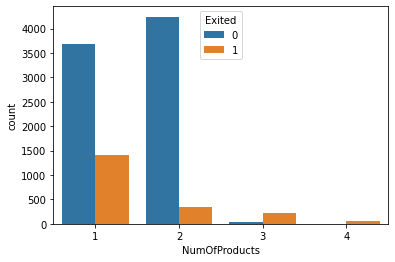

In [74]:
sns.countplot(df["NumOfProducts"],hue = df["Exited"])

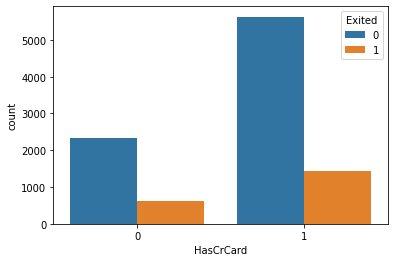

In [75]:
sns.countplot(df["HasCrCard"],hue = df["Exited"])

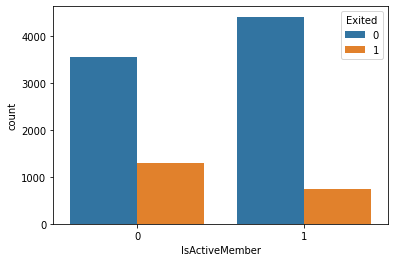

In [76]:
sns.countplot(df["IsActiveMember"],hue = df["Exited"])

In [ ]:
In EstimatedSalary

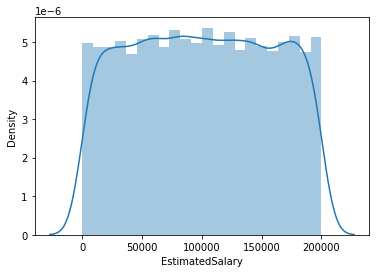

In [77]:
sns.distplot(df["EstimatedSalary"])

Encoding

In [9]:
geo_ohe = pd.get_dummies(data = df.Geography, prefix = 'Geography')
geo_ohe.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [10]:
df['Gender_encoded'] = df.Gender.replace({'Female':0,'Male':1})
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [11]:
final_df = pd.concat((df,geo_ohe), axis = 'columns')
final_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Geography_France,Geography_Germany,Geography_Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [12]:
final_df = final_df.drop(columns = ['Geography','Gender'])
final_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [13]:
final_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700,0.501400,0.250900,0.247700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.500023,0.433553,0.431698
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,1.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000


**Model** **Building** 

In [78]:
train, test = train_test_split(final_df, test_size = 0.2, random_state = 64)

train.shape, test.shape

((8000, 13), (2000, 13))

#### For scaling we apply MinMaxScaler

In [79]:
train_scaler, test_scaler = MinMaxScaler(), MinMaxScaler()

train_scaled = train_scaler.fit_transform(train)
test_scaled = test_scaler.fit_transform(test)

In [80]:
train_scaled = pd.DataFrame(train_scaled, columns = train.columns)
test_scaled = pd.DataFrame(test_scaled, columns = test.columns)

In [81]:
train_x, train_y = train_scaled.drop(columns = 'Exited'), train_scaled.Exited
test_x, test_y = test_scaled.drop(columns = 'Exited'), test_scaled.Exited

In [82]:
train_x.shape

(8000, 12)

# Creating the NN

In [83]:
import tensorflow as tf

In [84]:
# Instantiating ELU
elu = tf.keras.layers.ELU(alpha = 0.95)

# Instantiating the Sequential model
model = tf.keras.Sequential()

# Adding the input layer
model.add(tf.keras.layers.Input(shape = (12,)))

# Adding the hidden layers
model.add(tf.keras.layers.Dense(units = 6,
                                activation = 'relu',
                                kernel_initializer = 'he_uniform'))
model.add(tf.keras.layers.Dense(units = 8,
                                activation = elu,
                                kernel_initializer = 'he_uniform'))

# Adding the output layer
model.add(tf.keras.layers.Dense(units = 1,
                                activation = 'sigmoid',
                                kernel_initializer = 'glorot_uniform'))

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 8)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Compiling the model
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Recall'])

In [87]:
# Training the model and saving the training logs
history_object = model.fit(x = train_x, 
                           y = train_y,
                           batch_size = 256,
                           epochs = 100,
                           validation_data = (test_x, test_y),
                           use_multiprocessing = True,
                           workers = 20)

Epoch 1/100
32/32 [==============================] - 1s 13ms/step - loss: 0.6597 - accuracy: 0.6066 - recall: 0.4243 - val_loss: 0.5995 - val_accuracy: 0.7545 - val_recall: 0.1378
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5660 - accuracy: 0.7809 - recall: 0.0426 - val_loss: 0.5323 - val_accuracy: 0.8015 - val_recall: 0.0077
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5233 - accuracy: 0.7945 - recall: 0.0030 - val_loss: 0.5028 - val_accuracy: 0.8040 - val_recall: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5056 - accuracy: 0.7944 - recall: 0.0000e+00 - val_loss: 0.4902 - val_accuracy: 0.8040 - val_recall: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4969 - accuracy: 0.7944 - recall: 0.0000e+00 - val_loss: 0.4828 - val_accuracy: 0.8040 - val_recall: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4912 - ac

In [24]:
# Playing with the history object
dir(history_object)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [25]:
hist = history_object.history
hist.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [26]:
def history_visualizer(history_obj, keyword):
  epochs = history_obj.epoch
  hist = history_obj.history

  train_key = keyword
  val_key = f'val_{keyword}'

  train_data = hist.get(train_key)
  val_data = hist.get(val_key)

  plt.figure(figsize = (15,8))
  sns.lineplot(x = epochs, y = train_data)
  sns.lineplot(x = epochs, y = val_data)
  plt.legend(labels = [keyword.title(), val_key.title()])

  plt.show()

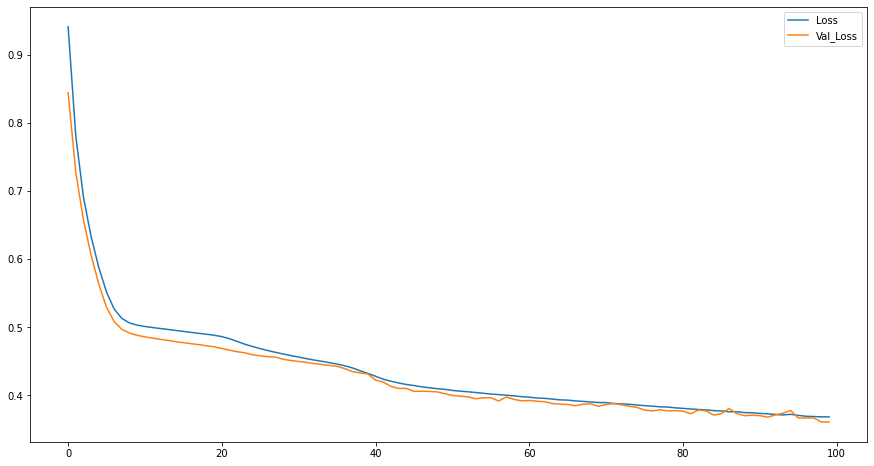

In [27]:
history_visualizer(history_object,'loss')

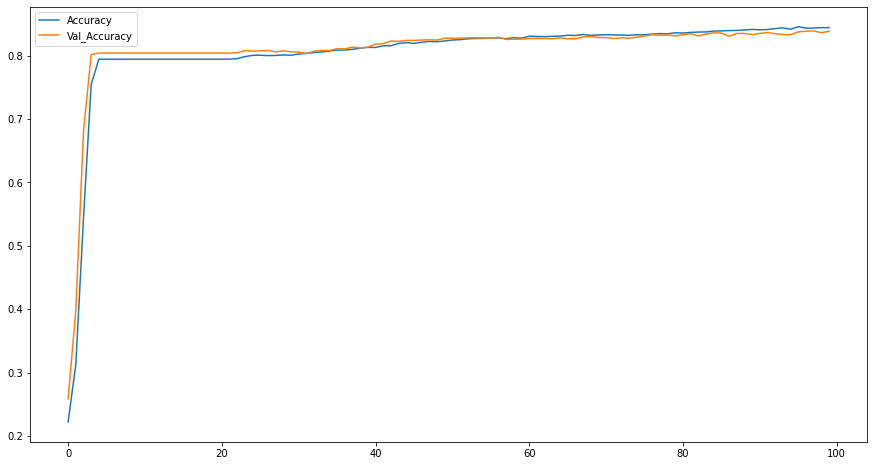

In [28]:
history_visualizer(history_object,'accuracy')

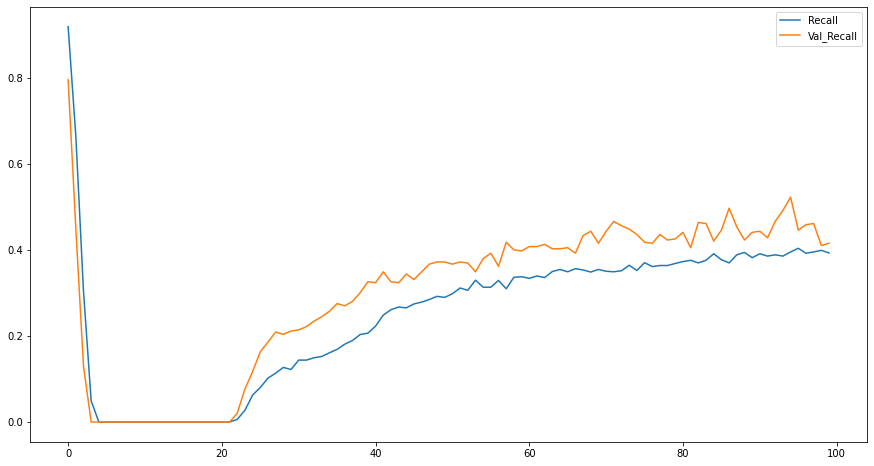

In [29]:
history_visualizer(history_object,'recall')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


In [31]:
[i for i in dir(model) if i.lower().__contains__('conf')]

['_configure_steps_per_execution',
 '_conform_to_reference_input',
 '_must_restore_from_config',
 '_preserve_input_structure_in_config',
 '_updated_config',
 'from_config',
 'get_config']

In [32]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 12),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'units': 6,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 8,
    'activation': {'class_name': 'ELU',
     'config': {'name': 'elu',
      'trainable': True,
      'dtype': 'float32',
      'alpha': 0.949999988079071}},
    'use_bias': True,
    'kernel_initializ

# Saving and loading the models

In [33]:
# Saving the trained models
model_weights_path = 'TrainedModels'
os.makedirs(model_weights_path, exist_ok = True)

model.save(os.path.join(model_weights_path,'base_model.tf'),save_format = 'tf')

In [34]:
# Loading the saved models
loaded_model = tf.keras.models.load_model(os.path.join(model_weights_path,'base_model.tf'))

In [35]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 78        
                                                                 
 dense_1 (Dense)             (None, 8)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 143
Trainable params: 143
Non-trainable params: 0
_________________________________________________________________


# tensorflow calbacks

In [36]:
dir(tf.keras.callbacks)

['BackupAndRestore',
 'BaseLogger',
 'CSVLogger',
 'Callback',
 'CallbackList',
 'EarlyStopping',
 'History',
 'LambdaCallback',
 'LearningRateScheduler',
 'ModelCheckpoint',
 'ProgbarLogger',
 'ReduceLROnPlateau',
 'RemoteMonitor',
 'TensorBoard',
 'TerminateOnNaN',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'experimental']

In [37]:
class MyCalbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs = {}):
    if (logs.get('accuracy')>0.8) & (logs.get('val_accuracy')>0.8):
      self.model.stop_training = True
      print()
      print('Condition Satisfied !')
      print()

In [38]:
conditional_callback = MyCalbacks()

In [39]:
# Building the model

# Instantiating ELU
elu = tf.keras.layers.ELU(alpha = 0.95)

# Instantiating the Sequential model
model_c = tf.keras.Sequential()

# Adding the input layer
model_c.add(tf.keras.layers.Input(shape = (12,)))

# Adding the hidden layers
model_c.add(tf.keras.layers.Dense(units = 6,
                                activation = 'relu',
                                kernel_initializer = 'he_uniform'))
model_c.add(tf.keras.layers.Dense(units = 8,
                                activation = elu,
                                kernel_initializer = 'he_uniform'))

# Adding the output layer
model_c.add(tf.keras.layers.Dense(units = 1,
                                activation = 'sigmoid',
                                kernel_initializer = 'glorot_uniform'))


# Compiling the model
model_c.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision','Recall'])

In [40]:
# Training the model and saving the training logs
history_object_c = model_c.fit(x = train_x, 
                           y = train_y,
                           batch_size = 256,
                           epochs = 100,
                           validation_data = (test_x, test_y),
                           use_multiprocessing = True,
                           workers = 20,
                           callbacks = [conditional_callback])

Epoch 1/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6746 - accuracy: 0.5680 - precision: 0.1718 - recall: 0.2881 - val_loss: 0.6103 - val_accuracy: 0.7675 - val_precision: 0.1456 - val_recall: 0.0383
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5894 - accuracy: 0.7834 - precision: 0.0926 - recall: 0.0061 - val_loss: 0.5520 - val_accuracy: 0.8025 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.7940 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5206 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5275 - accuracy: 0.7944 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5010 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - 

In [41]:
history_object_c.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

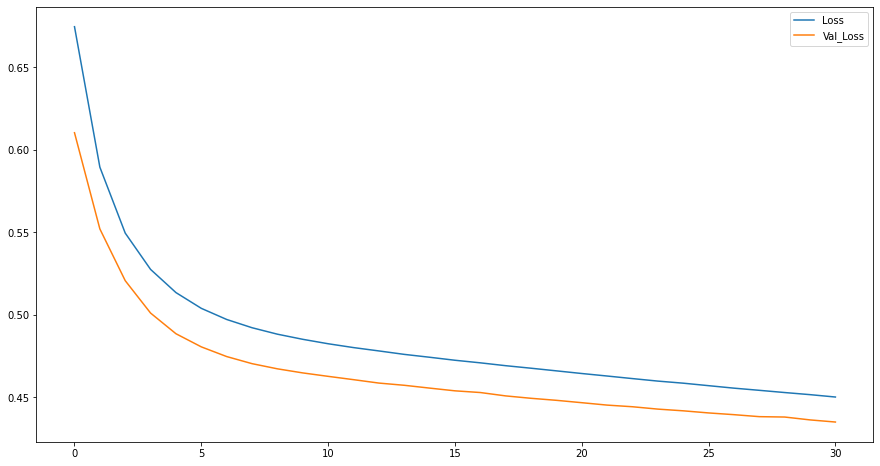

In [42]:
history_visualizer(history_object_c,'loss')

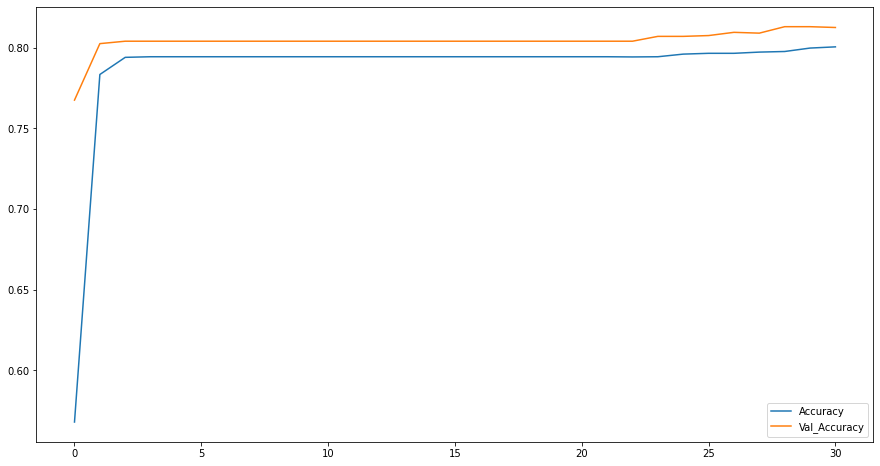

In [43]:
history_visualizer(history_object_c,'accuracy')

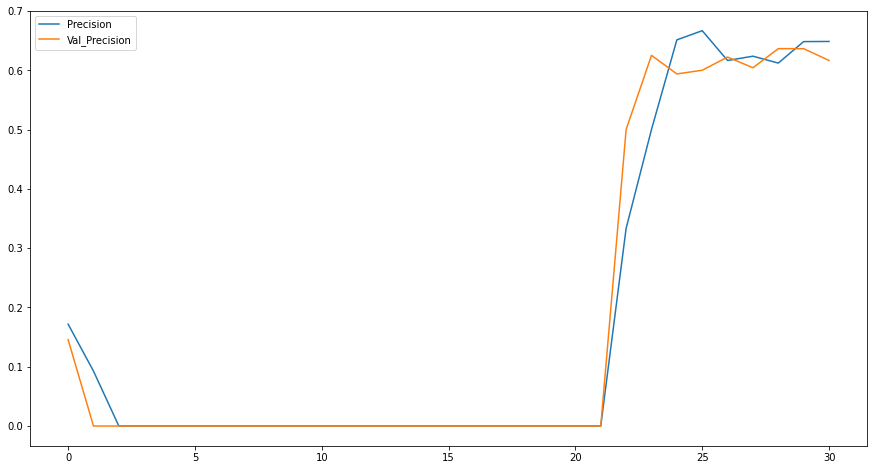

In [44]:
history_visualizer(history_object_c,'precision')

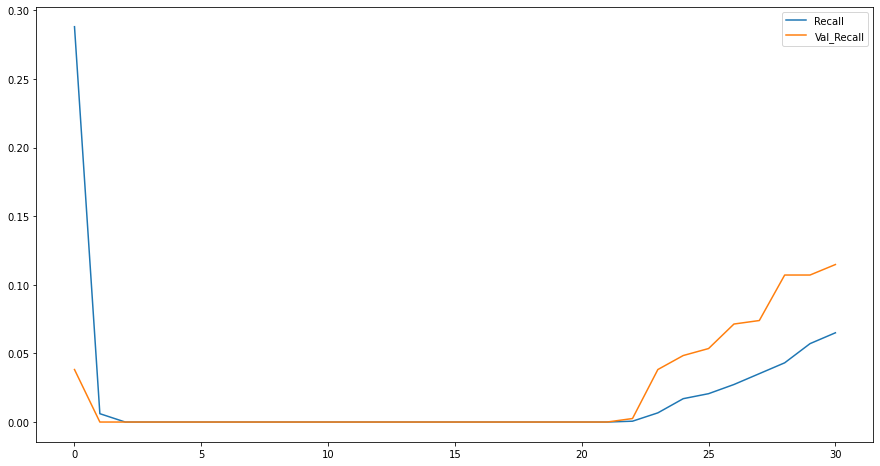

In [45]:
history_visualizer(history_object_c,'recall')

In [46]:
# Early Stopper Callbacks
EarlyStopper = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy', patience = 5)

# Conditional callback
class MyCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epochs, logs = {}):
    if (logs.get('accuracy')>0.94) & (logs.get('val_accuracy')>0.94):
      self.model.stop_training = True
      print()
      print('Condition Satisfied !')
      print()

cond_callback2 = MyCallbacks()

In [47]:
# Building the model

# Instantiating ELU
elu = tf.keras.layers.ELU(alpha = 0.95)

# Instantiating the Sequential model
model_es = tf.keras.Sequential()

# Adding the input layer
model_es.add(tf.keras.layers.Input(shape = (12,)))

# Adding the hidden layers
model_es.add(tf.keras.layers.Dense(units = 6,
                                activation = 'relu',
                                kernel_initializer = 'he_uniform'))
model_es.add(tf.keras.layers.Dense(units = 8,
                                activation = elu,
                                kernel_initializer = 'he_uniform'))

# Adding the output layer
model_es.add(tf.keras.layers.Dense(units = 1,
                                activation = 'sigmoid',
                                kernel_initializer = 'glorot_uniform'))


# Compiling the model
model_es.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision','Recall'])

In [48]:
# Training the model and saving the training logs
history_object_es = model_es.fit(x = train_x, 
                           y = train_y,
                           batch_size = 256,
                           epochs = 500,
                           validation_data = (test_x, test_y),
                           use_multiprocessing = True,
                           workers = 20,
                           callbacks = [EarlyStopper,cond_callback2])

Epoch 1/500
32/32 [==============================] - 2s 15ms/step - loss: 0.7513 - accuracy: 0.4412 - precision: 0.2034 - recall: 0.5891 - val_loss: 0.6872 - val_accuracy: 0.5800 - val_precision: 0.1981 - val_recall: 0.3750
Epoch 2/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6625 - precision: 0.1855 - recall: 0.1891 - val_loss: 0.6093 - val_accuracy: 0.7715 - val_precision: 0.1782 - val_recall: 0.0459
Epoch 3/500
32/32 [==============================] - 0s 7ms/step - loss: 0.5928 - accuracy: 0.7810 - precision: 0.1796 - recall: 0.0182 - val_loss: 0.5502 - val_accuracy: 0.8035 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5483 - accuracy: 0.7943 - precision: 0.3333 - recall: 6.0790e-04 - val_loss: 0.5169 - val_accuracy: 0.8040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/500
32/32 [==============================] - 0s 6ms/step - loss: 0.5243 - accur

In [49]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 38.0 MB/s 
     |████████████████████████████████| 1.6 MB 51.1 MB/s 


In [50]:
from keras_tuner.tuners import RandomSearch

In [51]:
# RandomSearch -> hypermodel
# hypermodel >> function that would be generating and compiling the entire model for us

# Datatypes for hyperparameter tuning
# Int > for tuning from a range of elements/numbers.  eg. range(5,15)
#------------syntax : hyp_key.Int('keyword specifying the purpose of this data',min_value, max_value, step)
# Choice > for tuning from a list of elements.     eg. [he_uniform, he_normal, glorot_unoform, glorot_normal]
#------------syntax : hyp_key.Choice('keyword specifying the purpose of this data',[list of elements])

In [52]:
def hypermodel(hyp_key):
  model_ = tf.keras.Sequential()

  model_.add(tf.keras.layers.Input(shape = (12,)))
  
  for i in range(hyp_key.Int('number of hidden layers', 1,7)):
    model_.add(tf.keras.layers.Dense(units = hyp_key.Int(f'number of neurons in hidden layer # {i}',4,13), 
                                     activation = hyp_key.Choice(f'activation function for hidden layer # {i}',['relu','elu','sigmoid']), 
                                     kernel_initializer = hyp_key.Choice(f'kernel_initializer for hidden layer # {i}',['he_normal','he_uniform','glorot_normal','glorot_uniform'])))
  
  model_.add(tf.keras.layers.Dense(units = 1, 
                                   activation = 'sigmoid', 
                                   kernel_initializer = hyp_key.Choice(f'kernel_initializer for output layer',['he_normal','he_uniform','glorot_normal','glorot_uniform'])))

  model_.compile(optimizer = hyp_key.Choice('Optimizer function',['Adam','rmsprop']),
                loss = 'binary_crossentropy',
                metrics = ['accuracy', 'Precision', 'Recall'])
  
  return model_

In [53]:
# Generating the tuner object
tuner_obj = RandomSearch(hypermodel = hypermodel,
                         objective = 'accuracy',
                         max_trials = 20,
                         seed = 64)

In [54]:
# validating the search space summary of the tuner object
tuner_obj.search_space_summary()

Search space summary
Default search space size: 6
number of hidden layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 7, 'step': 1, 'sampling': None}
number of neurons in hidden layer # 0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 13, 'step': 1, 'sampling': None}
activation function for hidden layer # 0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu', 'sigmoid'], 'ordered': False}
kernel_initializer for hidden layer # 0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
kernel_initializer for output layer (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
Optimizer function (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'rmsprop'], 'ordered': False}


In [55]:
# Finding the best model
tuner_obj.search(train_x,
                 train_y,
                 batch_size = 64)

Trial 20 Complete [00h 00m 02s]
accuracy: 0.7850000262260437

Best accuracy So Far: 0.7943750023841858
Total elapsed time: 00h 00m 51s


In [56]:
dir(tuner_obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_and_fit_model',
 '_build_hypermodel',
 '_configure_tensorboard_dir',
 '_deepcopy_callbacks',
 '_display',
 '_get_checkpoint_fname',
 '_get_tensorboard_dir',
 '_get_tuner_fname',
 '_override_compile_args',
 '_populate_initial_space',
 '_save_n_checkpoints',
 '_try_build',
 'directory',
 'distribution_strategy',
 'executions_per_trial',
 'get_best_hyperparameters',
 'get_best_models',
 'get_state',
 'get_trial_dir',
 'hypermodel',
 'load_model',
 'logger',
 'loss',
 'max_model_size',
 'metrics',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_search_begin',
 'on_search_end',
 'on_trial_b

In [57]:
tuner_obj.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
number of hidden layers: 4
number of neurons in hidden layer # 0: 7
activation function for hidden layer # 0: relu
kernel_initializer for hidden layer # 0: glorot_uniform
kernel_initializer for output layer: glorot_normal
Optimizer function: Adam
number of neurons in hidden layer # 1: 4
activation function for hidden layer # 1: relu
kernel_initializer for hidden layer # 1: glorot_uniform
number of neurons in hidden layer # 2: 7
activation function for hidden layer # 2: sigmoid
kernel_initializer for hidden layer # 2: glorot_normal
number of neurons in hidden layer # 3: 11
activation function for hidden layer # 3: relu
kernel_initializer for hidden layer # 3: he_uniform
number of neurons in hidden layer # 4: 11
activation function for hidden layer # 4: relu
kernel_initializer for hidden layer # 4: he_uniform
number of neurons in hidden layer # 5: 8
activation function for hidden layer # 5

In [58]:
best_5_models = tuner_obj.get_best_models(5)

In [59]:
model_new = best_5_models[2]

In [60]:
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
